# Neural Network - 뉴스 다중분류

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
print(train_labels[0])

3


In [23]:
# 데이터를 벡터로 변환
import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.  # 특정 인덱스의 위치를 1.으로 만듦
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
# 레이블을 벡터로 변환 - One Hot Encoding
def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i,l] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# 출력 46

In [31]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
# 훈련 검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
# 20번의 에포크 동안 훈련시킴
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 56ms/step - loss: 2.7433 - accuracy: 0.4950 - val_loss: 1.7891 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4387 - accuracy: 0.7068 - val_loss: 1.3129 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0423 - accuracy: 0.7841 - val_loss: 1.1193 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8138 - accuracy: 0.8317 - val_loss: 1.0310 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6415 - accuracy: 0.8673 - val_loss: 0.9470 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5119 - accuracy: 0.8948 - val_loss: 0.9181 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4073 - accuracy: 0.9153 - val_loss: 0.8808 - val_accuracy: 0.8190
Epoch 8/20
16

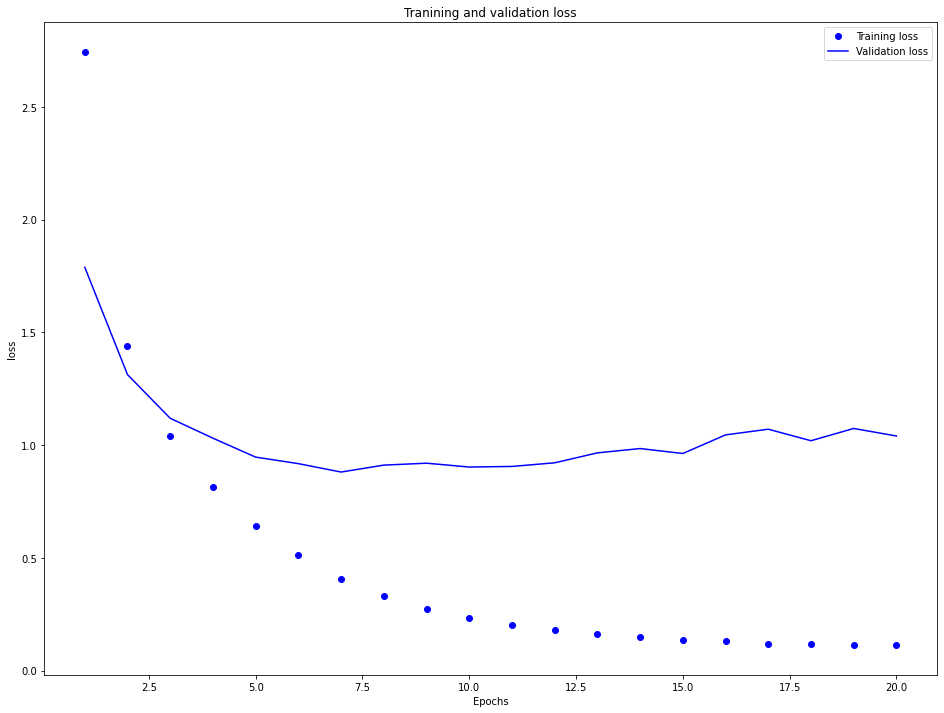

In [36]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Tranining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

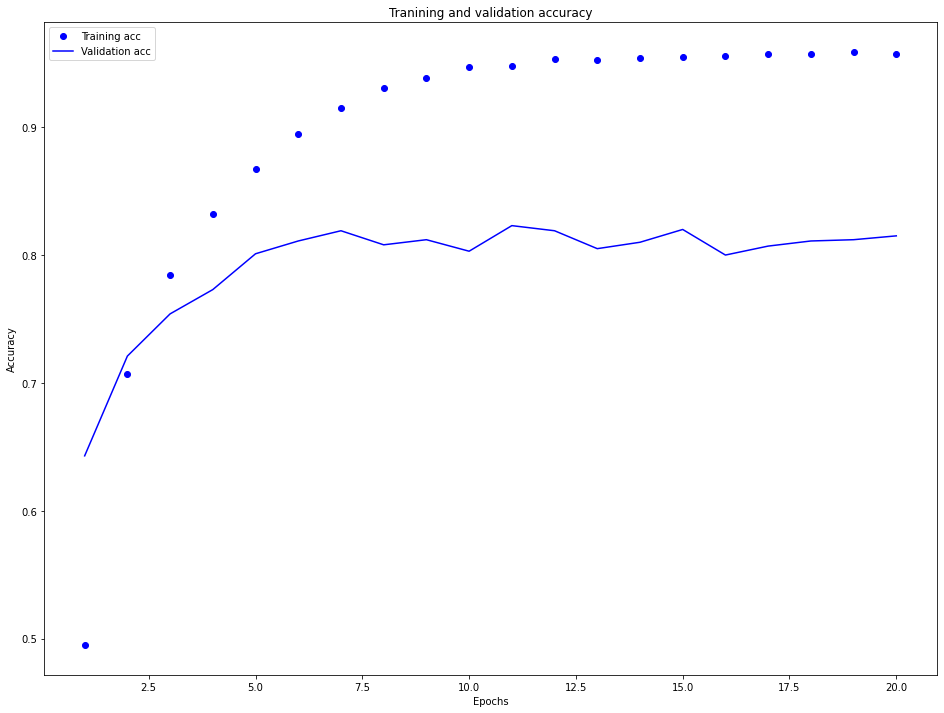

In [38]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Tranining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# 9번째 에포크에서 과대적합 -> 9번의 에포크로 새로운 훈련
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.8157 - accuracy: 0.5079
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.5369 - accuracy: 0.6989
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.1073 - accuracy: 0.7685
Epoch 4/9
16/16 [==============================] - 1s 40ms/step - loss: 0.8564 - accuracy: 0.8193
Epoch 5/9
16/16 [==============================] - 1s 39ms/step - loss: 0.6857 - accuracy: 0.8514
Epoch 6/9
16/16 [==============================] - 1s 40ms/step - loss: 0.5437 - accuracy: 0.8880
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.4392 - accuracy: 0.9097
Epoch 8/9
16/16 [==============================] - 1s 40ms/step - loss: 0.3579 - accuracy: 0.9241
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9762 - accuracy: 0.7934
[0.976240873336792, 0.7934104800224304]


In [41]:
predictions = model.predict(x_test)

In [42]:
predictions[0].shape

(46,)

In [43]:
np.sum(predictions[0])

1.0000001

In [44]:
np.argmax(predictions[0])

3